# DL5

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import torch.nn.init as init

In [3]:
info=pd.read_csv('data_info.csv', encoding='cp949')

In [4]:
tr=pd.read_csv('train.csv')

In [5]:
tst=pd.read_csv('test.csv')
#tst

In [6]:
sample=pd.read_csv('sample_submission.csv')
#sample

# tr 전처리

In [7]:
tr['preferred_difficulty_level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [8]:
tr['subscription_type'].unique()

array(['Basic', 'Premium'], dtype=object)

In [9]:
# 여러 개의 값을 한 번에 대체하는 딕셔너리 생성

tr['preferred_difficulty_level'] = tr['preferred_difficulty_level'].replace({'Low':1, 'Medium':2, 'High':3})
tr['subscription_type'] = tr['subscription_type'].replace({'Basic':1, 'Premium':2})
tr

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,1,1,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,2,1,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,2,2,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,1,1,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,2,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,1,2,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,2,1,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,3,1,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,1,1,2,0,1


In [10]:
tst['preferred_difficulty_level'] = tst['preferred_difficulty_level'].replace({'Low':1, 'Medium':2, 'High':3})
tst['subscription_type'] = tst['subscription_type'].replace({'Basic':1, 'Premium':2})
tst

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern
0,0001d6e9,9,15,11.173051,7.047243,19,15,82.074557,3,5,1,2,2,7
1,0002c77d,11,8,13.448592,24.583327,10,16,80.546040,4,2,1,1,4,4
2,0002df5b,11,28,18.548201,1.707616,9,19,73.676957,5,5,1,2,1,3
3,000b6068,14,17,13.383311,21.391389,12,6,63.314635,0,4,3,2,1,5
4,00184a0c,19,6,11.919663,18.126987,8,15,55.899647,1,4,2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ffe2eba5,10,24,11.924481,90.251023,20,21,70.552157,4,5,2,2,1,6
9996,ffe710f1,15,26,12.395364,10.205804,18,7,67.558845,2,2,2,1,3,5
9997,ffeccdef,6,13,17.036811,20.346781,22,9,89.294007,5,2,2,1,1,0
9998,fff3fcea,18,9,15.758179,156.521711,13,10,82.218390,2,5,1,2,2,5


# Train, Validation

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import torch.optim as optim
from torch.optim.lr_scheduler import LambdaLR

In [12]:
from sklearn.model_selection import train_test_split

# train, validation 분할
train, validation = train_test_split(tr, test_size=0.2, random_state=42)

In [13]:
# train 데이터와 validation 데이터를 numpy 배열로 생성
train_X = np.array(train.drop(['user_id', 'target'], axis=1))
train_y = np.array(train['target'])
validation_X = np.array(validation.drop(['user_id', 'target'], axis=1))
validation_y = np.array(validation['target'])

# PyTorch 텐서로 변환
train_X = torch.tensor(train_X, dtype=torch.float32)
train_y = torch.tensor(train_y, dtype=torch.int64)
validation_X = torch.tensor(validation_X, dtype=torch.float32)
validation_y = torch.tensor(validation_y, dtype=torch.int64)

In [103]:
import torch.nn.init as init

# 모델 정의
class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        self.fc1 = nn.Linear(13, 64)
        self.bn1 = nn.BatchNorm1d(64)  # 배치 정규화 레이어 추가
        self.fc2 = nn.Linear(64, 64)
        self.bn2 = nn.BatchNorm1d(64)  # 배치 정규화 레이어 추가
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.bn1(x)  # 배치 정규화 적용
        x = torch.relu(self.fc2(x))
        x = self.bn2(x)  # 배치 정규화 적용
        x = self.fc3(x)
        x = torch.sigmoid(x)  # Sigmoid 활성화 함수 적용
        return x

model = BinaryClassifier()
#initialize_weights(model)

# 하이퍼파라미터 설정
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)
scheduler = LambdaLR(optimizer, lr_lambda=lambda epoch: 0.99 ** epoch)
num_epochs = 150

Epoch [15/150], Train Loss: 0.6915, Train Accuracy: 0.5119, Validation Loss: 0.6889, Validation Accuracy: 0.5065
Epoch [30/150], Train Loss: 0.6775, Train Accuracy: 0.5098, Validation Loss: 0.6797, Validation Accuracy: 0.4925
Epoch [45/150], Train Loss: 0.6693, Train Accuracy: 0.5415, Validation Loss: 0.6748, Validation Accuracy: 0.5125
Epoch [60/150], Train Loss: 0.6634, Train Accuracy: 0.5609, Validation Loss: 0.6698, Validation Accuracy: 0.5315
Epoch [75/150], Train Loss: 0.6582, Train Accuracy: 0.5863, Validation Loss: 0.6664, Validation Accuracy: 0.5385
Epoch [90/150], Train Loss: 0.6533, Train Accuracy: 0.6010, Validation Loss: 0.6638, Validation Accuracy: 0.5570
Epoch [105/150], Train Loss: 0.6486, Train Accuracy: 0.6095, Validation Loss: 0.6618, Validation Accuracy: 0.5535
Epoch [120/150], Train Loss: 0.6444, Train Accuracy: 0.6171, Validation Loss: 0.6601, Validation Accuracy: 0.5615
Epoch [135/150], Train Loss: 0.6405, Train Accuracy: 0.6209, Validation Loss: 0.6587, Validati

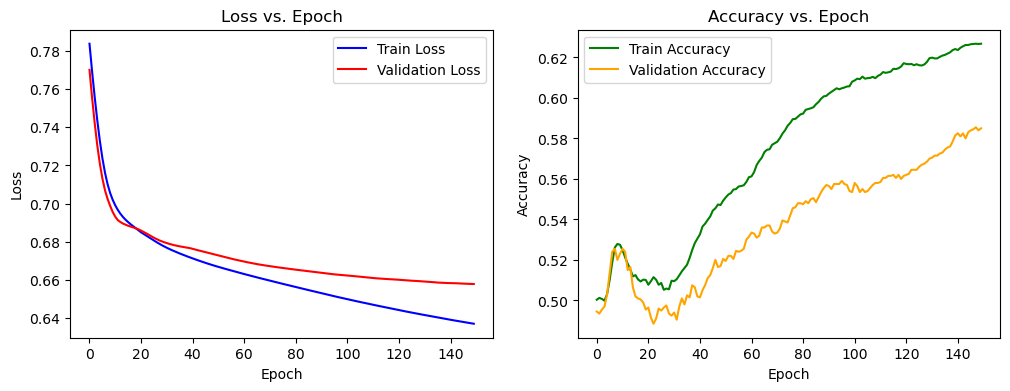

In [104]:
# 모델 학습
train_losses = []  # 훈련 손실 저장
train_accuracies = []  # 훈련 정확도 저장
validation_losses = []  # 검증 손실 저장
validation_accuracies = []  # 검증 정확도 저장

for epoch in range(num_epochs):
    # 훈련 데이터에 대한 forward 및 역전파
    optimizer.zero_grad()
    train_outputs = model(train_X)
    train_loss = criterion(train_outputs, train_y.float().view(-1, 1))
    train_loss.backward()
    optimizer.step()
    
    # 훈련 데이터 정확도 계산
    train_predicted = (train_outputs > 0.5).float()
    train_accuracy = accuracy_score(train_y, train_predicted)
    
    # 검증 데이터에 대한 forward
    with torch.no_grad():
        validation_outputs = model(validation_X)
        validation_loss = criterion(validation_outputs, validation_y.float().view(-1, 1))
    
    # 검증 데이터 정확도 계산
    validation_predicted = (validation_outputs > 0.5).float()
    validation_accuracy = accuracy_score(validation_y, validation_predicted)
    
    # 손실과 정확도 저장
    train_losses.append(train_loss.item())
    train_accuracies.append(train_accuracy)
    validation_losses.append(validation_loss.item())
    validation_accuracies.append(validation_accuracy)
    
    if (epoch + 1) % (num_epochs // 10) == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], '
              f'Train Loss: {train_loss.item():.4f}, Train Accuracy: {train_accuracy:.4f}, '
              f'Validation Loss: {validation_loss.item():.4f}, Validation Accuracy: {validation_accuracy:.4f}')

# 손실과 정확도 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(validation_losses, label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy', color='green')
plt.plot(validation_accuracies, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.show()

# Retrain

In [24]:
X = np.array(tr.drop(['user_id', 'target'], axis=1))  # 'target' 열을 제외한 모든 열을 특성으로 사용
y = np.array(tr['target'])
X_test = np.array(tst.drop('user_id', axis=1))

# PyTorch 텐서로 변환
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

In [105]:
import torch.nn.init as init

# 모델 정의
class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        self.fc1 = nn.Linear(13, 64)
        self.bn1 = nn.BatchNorm1d(64)  # 배치 정규화 레이어 추가
        self.fc2 = nn.Linear(64, 64)
        self.bn2 = nn.BatchNorm1d(64)  # 배치 정규화 레이어 추가
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.bn1(x)  # 배치 정규화 적용
        x = torch.relu(self.fc2(x))
        x = self.bn2(x)  # 배치 정규화 적용
        x = self.fc3(x)
        x = torch.sigmoid(x)  # Sigmoid 활성화 함수 적용
        return x

model = BinaryClassifier()
#initialize_weights(model)

# 하이퍼파라미터 설정
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)
scheduler = LambdaLR(optimizer, lr_lambda=lambda epoch: 0.99 ** epoch)
num_epochs = 150

Epoch [15/150], Loss: 0.6866, Accuracy: 0.4804
Epoch [30/150], Loss: 0.6780, Accuracy: 0.4988
Epoch [45/150], Loss: 0.6713, Accuracy: 0.5257
Epoch [60/150], Loss: 0.6648, Accuracy: 0.5593
Epoch [75/150], Loss: 0.6581, Accuracy: 0.5832
Epoch [90/150], Loss: 0.6510, Accuracy: 0.6060
Epoch [105/150], Loss: 0.6439, Accuracy: 0.6248
Epoch [120/150], Loss: 0.6370, Accuracy: 0.6375
Epoch [135/150], Loss: 0.6308, Accuracy: 0.6396
Epoch [150/150], Loss: 0.6254, Accuracy: 0.6422


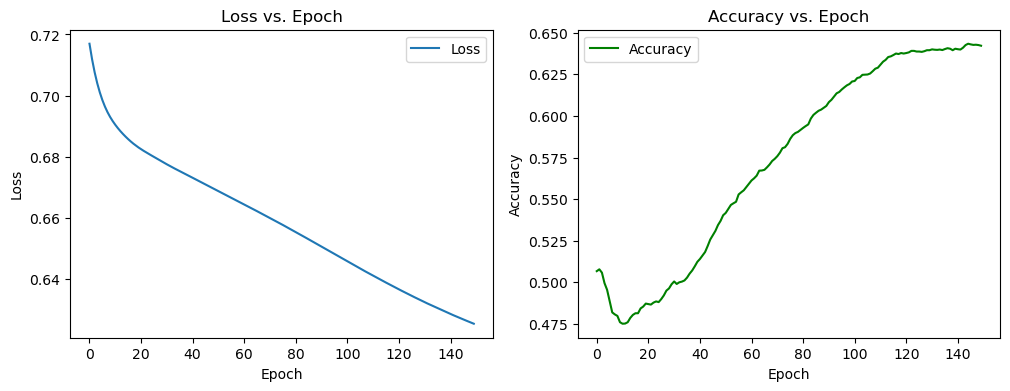

In [106]:
# 모델 학습
losses = []  # 손실 저장
accuracies = []  # 정확도 저장
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y.float().view(-1, 1))
    loss.backward()
    optimizer.step()
    
    # 정확도 계산
    predicted = (outputs > 0.5).float()
    accuracy = accuracy_score(y, predicted)
    
    losses.append(loss.item())
    accuracies.append(accuracy)
    
    if (epoch + 1) % (num_epochs // 10) == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

# 손실과 정확도 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.show()

# Prediction

In [111]:
# 모델을 평가 모드로 설정
model.eval()

# PyTorch 텐서로 변환
X_test = torch.tensor(X_test, dtype=torch.float32)

# 예측 생성
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred >= 0.562).float()  # 임계값 0.5를 기준으로 이진 분류 결과 생성

# 제출 양식 파일(sample_submission.csv)의 'target' 컬럼에 나의 Test 데이터에 대한 예측 결과로 채우기
sub=sample.copy()
sub['target'] = y_pred

# 리더보드 제출을 위해 나의 예측 결과를 baseline_submit.csv로 저장
sub['target']=sub['target'].astype('int')

submit_path = 'submission/DL5.5.1.csv'
sub.to_csv(submit_path, index=False)

sub['target'].value_counts()

C:\Users\young0tete\AppData\Local\Temp\ipykernel_142940\80687382.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)


1    6206
0    3794
Name: target, dtype: int64

In [27]:
tr['target'].value_counts()

1    6199
0    3801
Name: target, dtype: int64

In [113]:
# 모델 저장
torch.save(model.state_dict(), 'model5.5.1.pth')